# Lab 6 - Model comparison
## Patryk Chorąży, 402569

Main idea is to instead of splitting the dataset into two parts (test and training set) to estimate how model would behave in presence of new data. This is being done by evaluating so called log likelihood which is an array of values of logarithm of likelihood for each of datapoints individually.

We will use this informations with two metrics:

- Watanabe-Akaike Information Criterion (also known as Widely Applicable Information Criterion, WAIC), which is averages log likelihood and estimates the effective number of paraemeters in the model
- PSIS-LOOCV - Pareto Smoothed Importance Sampling Leave-one-out Cross Validation. It is an estimate of value obtained from Leave-one-out Cross Validation by using modified importance sampling method instead of running inference N times where N is number of samples, leaving one each time.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

from cmdstanpy import CmdStanModel

In [133]:
F = len("Patryk")
L = len("Chorąży")

N = (L+F)*100
N

1300

## Excercise 1 - generate data
#### Compile code_1.stan and generate data

In [134]:
code_1 = CmdStanModel(stan_file='code_1.stan')

R = 1
sim_1 = code_1.sample(data={'N': N}, iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=20042023,
                     refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [135]:
sim_1_df = sim_1.draws_pd()
sim_1_df.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.01,-1.28574,15.7368,-0.607976,0.850032,1.69014,-0.016158,0.783106,...,0.219307,0.046526,-0.059895,-0.173848,0.033951,-0.445275,1.19056,0.215153,0.212201,-0.708262


#### Compile code_2.stan and generate data

In [136]:
code_2 = CmdStanModel(stan_file='code_2.stan')

R = 1
sim_2 = code_2.sample(data={'N': N}, iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=20042023,
                     refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [137]:
sim_2_xr = sim_2.draws_xr()
sim_2_X = sim_2_xr['X'][0,0,:,:]
sim_2_X

<xarray.DataArray 'X' (X_dim_0: 1300, X_dim_1: 3)>
array([[-1.28574 ,  2.00431 , -0.641059],
       [ 0.847453, -0.321671,  0.452139],
       [-0.84245 ,  1.82319 ,  1.67444 ],
       ...,
       [-1.30612 , -0.24747 , -0.884587],
       [ 0.68884 , -1.15604 , -0.437132],
       [ 1.20745 , -0.625008, -0.608053]])
Coordinates:
    chain    int64 1
    draw     int64 0
Dimensions without coordinates: X_dim_0, X_dim_1

## Excercise 2 - compare normal and student models for data from first file

#### Compile both models

In [138]:
code_3 = CmdStanModel(stan_file='code_3.stan')
code_4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


#### Prepare fit data

In [139]:
y_df = sim_1_df.loc[:,'y[1]':].values[0]
data_fit = dict(N=N, y = y_df)

#### Fit model to code_3.stan

In [140]:
fit_3 = code_3.sample(data=data_fit, seed=20042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


#### Fit model to code_4.stan

In [141]:
fit_4 = code_4.sample(data=data_fit, seed=20042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |███

INFO:cmdstanpy:CmdStan done processing.


#### Compare models using az.compare

#### a) "loo"

In [142]:
compare_dict = {"fit_3": fit_3, "fit_4": fit_4}
compare_loo = az.compare(compare_dict, ic="loo")
compare_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
fit_4,0,-1993.733958,4.826714,0.000000,1.0,41.549189,0.000000,False,log
fit_3,1,-2602.650944,39.895754,608.916986,0.0,176.760798,149.436303,True,log


#### b) "waic"

In [143]:
compare_waic = az.compare(compare_dict, ic="waic")
compare_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
fit_4,0,-1993.726770,4.819526,0.000000,1.000000e+00,41.547204,0.0000,True,log
fit_3,1,-2607.339535,44.584345,613.612765,5.551115e-16,179.537177,152.3244,True,log


#### Compare models using az.plot_compare

#### a) "loo"

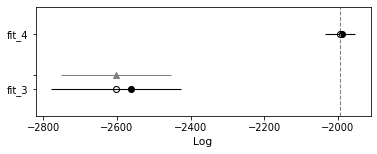

In [144]:
az.plot_compare(compare_loo)
plt.show()

#### b) "waic"

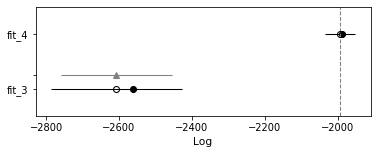

In [145]:
az.plot_compare(compare_waic)
plt.show()

## Excercise 3 - compare models with different numbers of predictors

#### Compile model

In [146]:
code_5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


#### Compile model for 1 Predictor

In [147]:
# K - Number of predictors
y_df = sim_1_df.loc[:,'y[1]':].values[0]

In [148]:
data_fit_1 = dict(N=N, K=1, y = y_df, X = sim_2_X[:,:1])
fit_5_1_pred = code_5.sample(data=data_fit_1, seed=20042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:03 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:04 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                       
chain 2 |██████████| 00:05 Sampling completed                       
chain 3 |██████████| 00:05 Sampling completed                       
chain 4 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


#### Compile model for 2 Predictors

In [149]:
data_fit_2 = dict(N=N, K=2, y = y_df, X = sim_2_X[:,:2])
fit_5_2_pred = code_5.sample(data=data_fit_2, seed=20042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |███


INFO:cmdstanpy:CmdStan done processing.


#### Compile model for 3 Predictors

In [150]:
data_fit_3 = dict(N=N, K=3, y = y_df, X = sim_2_X)
fit_5_3_pred = code_5.sample(data=data_fit_3, seed=20042023)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:06 Iteration: 1800 / 20


INFO:cmdstanpy:CmdStan done processing.


### Compare models for 1, 2 and 3 predictors as in previous excercise

#### a) "loo"

In [151]:
compare_dict = {"1 predictor": fit_5_1_pred, "2 predictors": fit_5_2_pred, "3 predictors": fit_5_3_pred}
compare_loo = az.compare(compare_dict, ic="loo")
compare_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1 predictor,0,-2604.268129,41.773927,0.000000,1.000000e+00,177.777640,0.000000,True,log
2 predictors,1,-2605.530293,41.706559,1.262163,0.000000e+00,177.703316,0.257812,True,log
3 predictors,2,-2606.694464,42.836882,2.426335,6.661338e-16,177.844156,0.652731,True,log


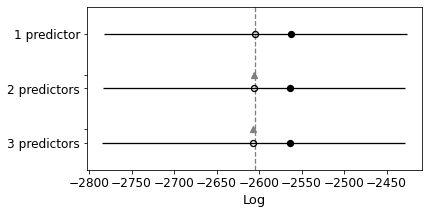

In [152]:
az.plot_compare(compare_loo)
plt.show()

#### b) "waic"

In [153]:
compare_waic = az.compare(compare_dict, ic="waic")
compare_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
1 predictor,0,-2604.389999,41.895796,0.000000,1.000000e+00,177.900128,0.000000,True,log
2 predictors,1,-2608.245321,44.421588,3.855322,0.000000e+00,179.346235,1.629358,True,log
3 predictors,2,-2609.299950,45.442368,4.909950,1.665335e-14,179.469999,1.941863,True,log


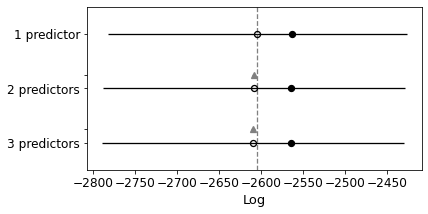

In [154]:
az.plot_compare(compare_waic)
plt.show()